# Rabbani Nur Kumoro - 21/472599/PA/20310
# Computer Vision and Image Analysis - CS - Assignment 2
# COVID-19 Classification from Chest X-Ray Images using Convolutional Neural Network (CNN)


# 1. Import Required Libraries
Additionally, a seed will be set in order to achive reproducible results.

In [ ]:
# *
import os
import cv2
import shutil
import random
import PIL
import posixpath
import pathlib
import glob
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image, ImageFont
from ann_visualizer.visualize import ann_viz
from pandas import DataFrame
from itertools import chain
from imutils import paths
from tensorflow import keras
from keras import layers
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.layers import *
from keras.models import *
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Preprocessing Data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils.vis_utils
import pydot
import pydotplus
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils, load_img, to_categorical, plot_model
from importlib import reload
from keras.utils.vis_utils import plot_model, model_to_dot
from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder
from pydotplus import graphviz
reload(keras.utils.vis_utils)
keras.utils.vis_utils.pydot = pydot

# Training Model
from keras import callbacks
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, load_model, Model
from keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Activation,GlobalMaxPool2D, Dense, Flatten, BatchNormalization, Dropout, Input
from keras.optimizers import Adam, RMSprop, Adamax, SGD

# Evaluation
import itertools
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Set Seed
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
print('Imported Successfully')
%matplotlib inline

Imported Successfully


# 2. Dataset

The Dataset was acquired through Google Drive Dataset give from Wahyono, S.Kom., Ph.D. and Kaggle Dataset that has been used for research purposes from Joseph Paul Cohen and Paul Morrison and Lan Dao COVID-19 Image Data Collection.

From: https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/

The author of the above repository transformed the data from https://github.com/ieee8023/covid-chestxray-dataset

Dataset Link:
1. http://ugm.id/MVDataset
2. https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets

The difference between those datasets is that Kaggle Dataset has a balance of labeled data between Training and Test Validation, Training Data has 74 Images for each Positive and Negative Case, while the Testing Data has 20 Images. The dataset from UGM has an imbalance amount of data for Positive and Negative Cases, with 58 Positives and 98 Negatives. Therefore, I will use the balanced dataset from Kaggle that completes the incomplete dataset from UGM.

#### Plot Six Random Images from the Train Folder
I plot six random images that shows Positive and Negative cases

/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Positif/nejmoa2001191_f3-PA.jpeg
/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Positif/nejmoa2001191_f4.jpeg
/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Negatif/IM-0025-0001.jpeg
/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Negatif/IM-0086-0001.jpeg
/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Positif/ards-secondary-to-tiger-snake-bite.png
/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 /train/Negatif/IM-0009-0001.jpeg


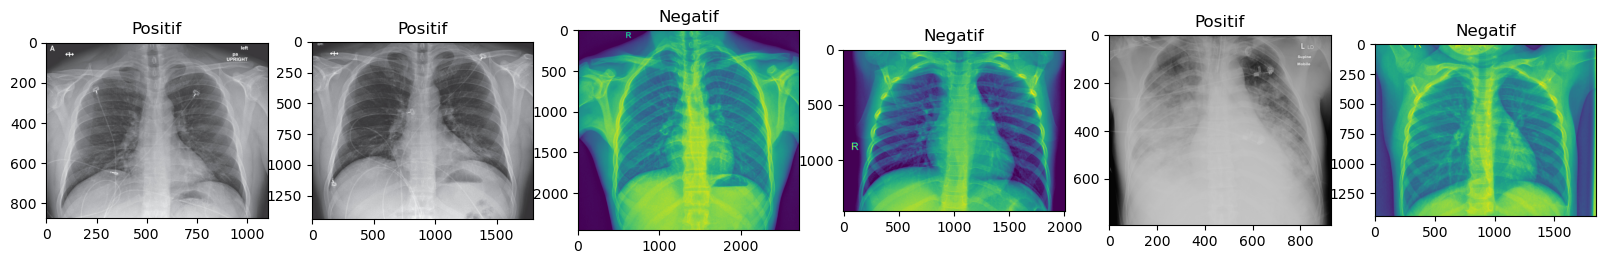

In [ ]:
img_folder = '/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 Dataset/train'
plt.figure(figsize =(20,20))
for i in range(6):
    class_ = random.choice(os.listdir(img_folder))
    class_path = os.path.join(img_folder, class_)
    file =random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path,file)
    print(image_path)
    img = mpimg.imread(image_path)
    ax =plt.subplot(1,6,(i+1))
    plt.imshow(img)
    ax.title.set_text(class_)

# 3. Image Data Pre-Processing
### The following steps were typically applied to custom dataset for CNN Models:

- Access and Open the Image Files, which is stored in a COVID-19 Folder containing Images of Different Classes,
- Read the Image Files from the COVID-19 Folder and convert them to the Appropriate Color Format,
- Resize the Images to match the input size required by the CNN Model's Input Layer,
- Convert the Image Pixels to a Float Datatype,
- Normalize the Images by Scaling Pixel Values between 0 and 1 (from 0 to 255), which promotes Faster Convergence,
- Convert the Data to a Numpy Array or a Tensor Object,
- Set up the Folder Structure for the Custom Image Data.

In [ ]:
def create_dataset(img_folders, IMG_WIDTH, IMG_HEIGHT):
    data = []
    target = []
    num_imgs = 0

    for folder in os.listdir(img_folders):
        folder_path = os.path.join(img_folders, folder)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path) or os.path.getsize(img_path) == 0:
                continue

            image = cv2.imread(img_path)
            if image is None:
                continue

            # Pre-Processing
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            image = image.astype('float32')
            image /= 255

            data.append(image)
            target.append(folder)
            num_imgs += 1

    data = np.array(data)
    target = np.array(target)

    return data, target, num_imgs

#### Load the Train and Test Image Data

In [ ]:
IMG_WIDTH= 224
IMG_HEIGHT=224
train_path='/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 Dataset/train/'
test_path='/Users/rabbanikumoro/tensorflow-test/Penglihatan Komputer dan Analisis Citra/COVID-19 Dataset/test/'

In [ ]:
train_img,train_target,num_img = create_dataset(train_path,IMG_WIDTH,IMG_HEIGHT)
test_img,test_target,num_test_img = create_dataset(test_path,IMG_WIDTH,IMG_HEIGHT)

#### Plot Six Random Images after Pre-Processing
The new Images plot shown the standarization of the same, after the preprocess function has been applied.

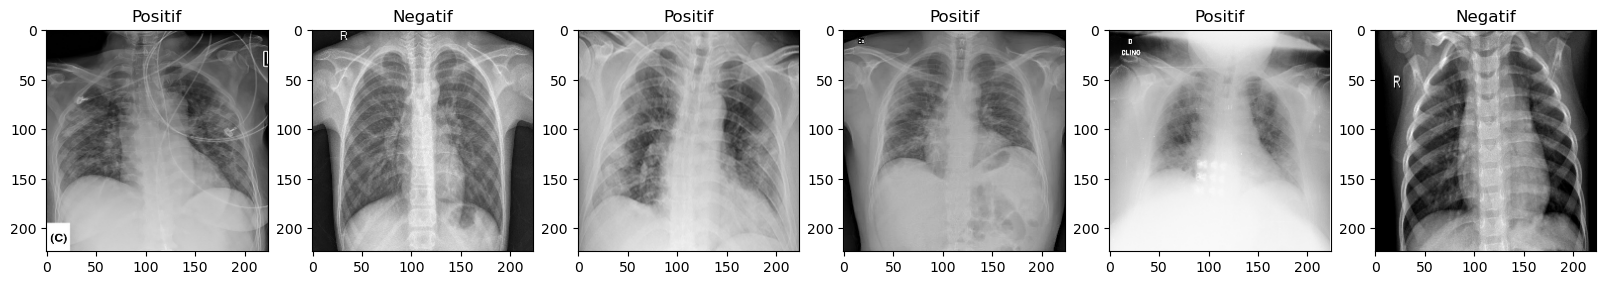

In [ ]:
plt.figure(figsize=(20,20))
for i in range(6):
    random_num = random.randint(0,num_img)
    ax=plt.subplot(1,6,(i+1))
    plt.imshow(train_img[random_num])
    ax.title.set_text(train_target[random_num])

#### Convert Text Labels into Numerical Codes

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(train_target))}
print(target_dict)
train_target= [target_dict[train_target[i]] for i in range(len(train_target))]
train_target=np.array(train_target)
train_img=np.array(train_img)
test_target= [target_dict[test_target[i]] for i in range(len(test_target))]
test_target=np.array(test_target)
test_img=np.array(test_img)

{'Negatif': 0, 'Positif': 1}


# 4. Modeling


In [ ]:
#Saving best model while monitoring accuracy
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')

#early stopping for preventing overfitting
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

#### Define the Convolutional Neural Network Model
- Define a Sequential() Model,
- Add the first layer: 32 is the number of filter
- kernel_size specifies the size of our filters,
- Activation specifies the activation function,
- Input_shape specifies what type of input we are going to pass to the network,
- Second layer: specified 64 filters (must be a power of 2),
- Define a Max Pooling: kernel_size which specified the size of the pooling window,
- Use Dropout to ensure the model will not overfit, as some neurons randomly will not be selected for activation. This prevents the model from overfitting,
- Then we repeat the above steps to make a deeper network,
- Flatten the Layer
- Create an output sigmoid function
- Compile the Model using binary_crossentropy because this is Binary Classification Problem with adam as the Optimizer, and the metric that we want to monitor is the Accuracy.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics = ["accuracy"])

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                      

2023-04-27 10:28:35.637059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-27 10:28:35.637350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Visualizing the CNN Deep Learning Model Architecture

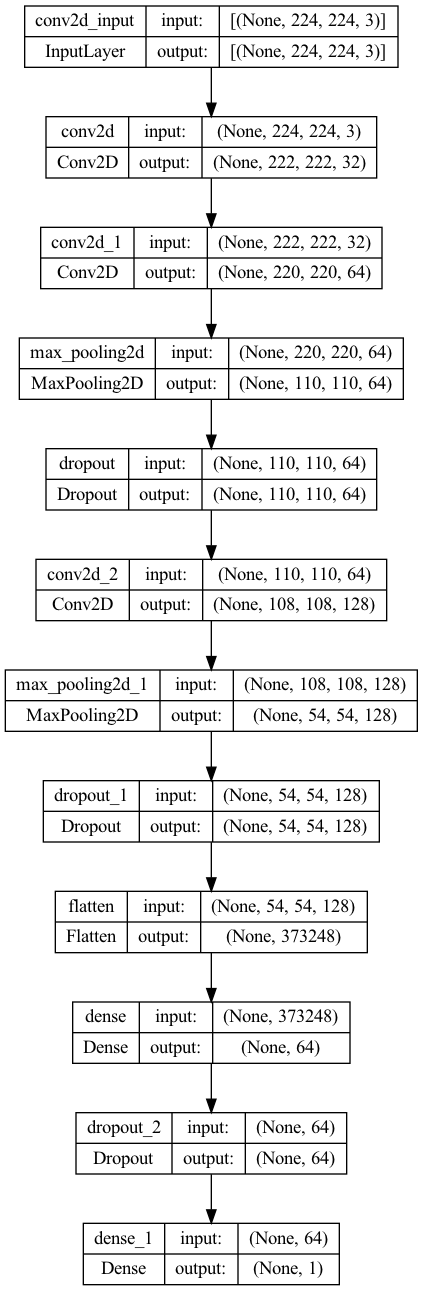

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

#### CNN Model Training

In [ ]:
history = model.fit(train_img, train_target,
          validation_split=0.10,
          epochs=20,
          batch_size=32,
          shuffle=True,
          callbacks=[model_chkpt, early_stopping]
        )

Epoch 1/20


2023-04-27 10:30:27.848629: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-27 10:30:28.172148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 4.7071 - accuracy: 0.4586

2023-04-27 10:30:31.235307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 632ms/step - loss: 4.7071 - accuracy: 0.4586 - val_loss: 0.7885 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 3s 552ms/step - loss: 0.6487 - accuracy: 0.6466 - val_loss: 0.4823 - val_accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 3s 496ms/step - loss: 0.7613 - accuracy: 0.5188 - val_loss: 0.7011 - val_accuracy: 0.4000
Epoch 4/20
5/5 [==============================] - 3s 509ms/step - loss: 0.6222 - accuracy: 0.6241 - val_loss: 0.6081 - val_accuracy: 0.9333
Epoch 5/20
5/5 [==============================] - 3s 551ms/step - loss: 0.5042 - accuracy: 0.7519 - val_loss: 0.3384 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 3s 537ms/step - loss: 0.3584 - accuracy: 0.8571 - val_loss: 0.1214 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 3s 491ms/step - loss: 0.3833 - accuracy: 0.8120 - val_loss: 0.1571 - val_accuracy: 1.0000
Epoch 8/20
5/5 [===========

# 5. Evaluation

#### Plot the Accuracy and Loss Function, for the Train and Validation Sample

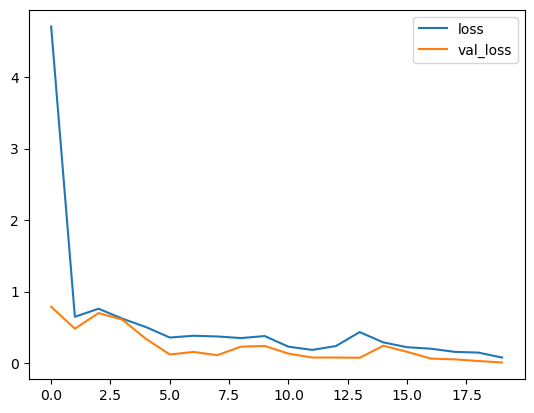

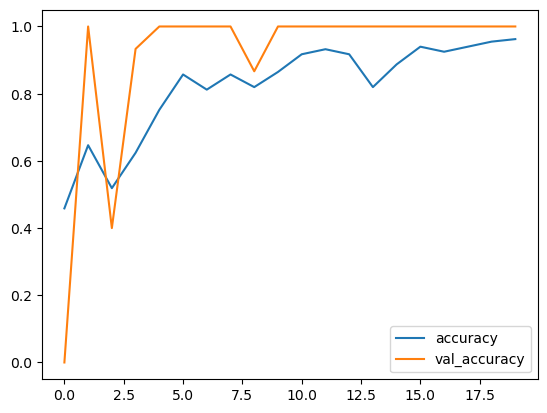

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

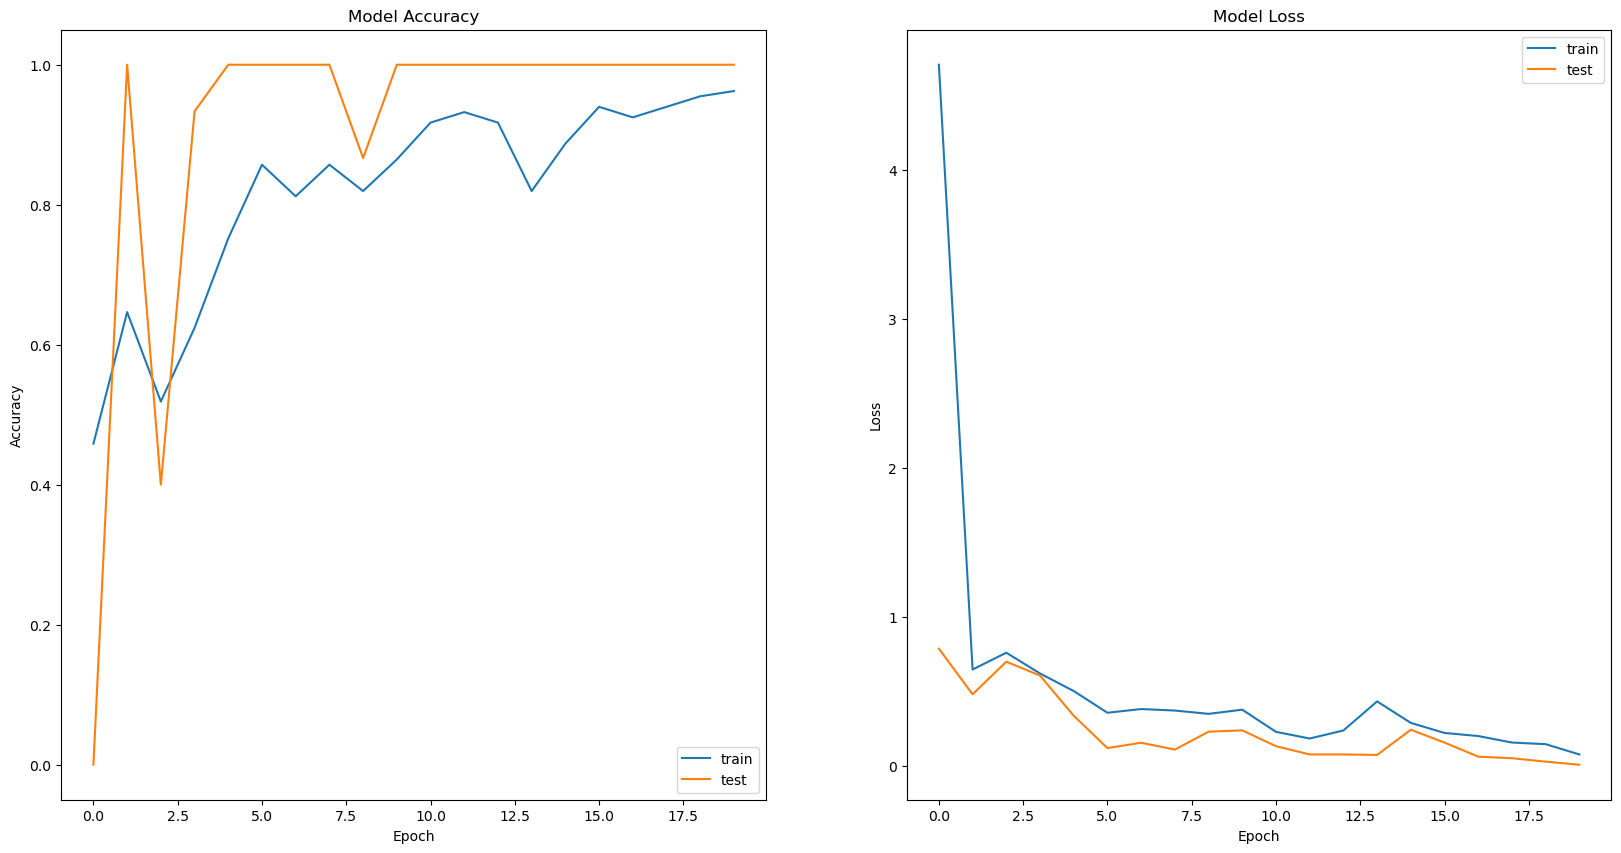

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### Performance Evaluation - Accuracy, Classification Report & Confusion Matrix on Testing Validation Data

In [ ]:
pred = model.predict(test_img,batch_size=32)
label = [int(p>=0.5) for p in pred]

# Performance Evaluation - Accuracy, Classification Report & Confusion Matrix
# Accuracy Score
print ('Accuracy Score : ', accuracy_score(label, test_target), '\n')
# Precision, Recall Report
print ('Classification Report :\n\n' ,classification_report(label, test_target))

1/2 [==============>...............] - ETA: 0s

2023-04-27 10:31:23.082589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 279ms/step
Accuracy Score :  0.975 

Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



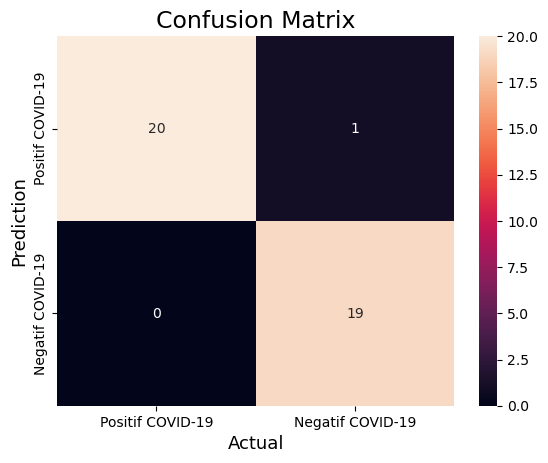

In [ ]:
y_result = np.round_(pred).astype(int)
y_true = y_result.reshape(-1)

cm = confusion_matrix(y_true,test_target)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positif COVID-19','Negatif COVID-19'],
            yticklabels=['Positif COVID-19','Negatif COVID-19'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### As it shown above, the model has a remarkable accuracy (97.5%) in order to predict if the person has a COVID-19.